# Task 2

S = susceptible

I = infected

R = recovered

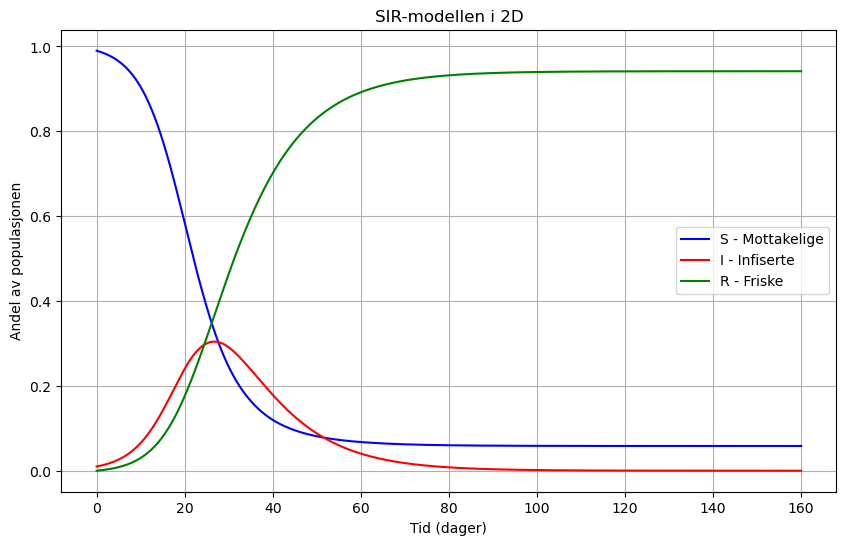

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definerer SIR-modellen i 2D
def SIR2D(t, y, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Parametere
beta = 0.3   # Smittsomhet
gamma = 0.1  # Tilfriskning

# Initialbetingelser
S0, I0, R0 = 0.99, 0.01, 0.0
initial_conditions = [S0, I0, R0]

# Tidsrom
t_span = (0, 160)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Løse ODE
sol = solve_ivp(SIR2D, t_span, initial_conditions, args=(beta, gamma), t_eval=t_eval)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='S - Mottakelige', color='blue')
plt.plot(sol.t, sol.y[1], label='I - Infiserte', color='red')
plt.plot(sol.t, sol.y[2], label='R - Friske', color='green')
plt.xlabel('Tid (dager)')
plt.ylabel('Andel av populasjonen')
plt.title('SIR-modellen i 2D')
plt.legend()
plt.grid()
plt.show()
